# 강사 예시
## 강사 메일 : drkail6916.work@gmail.com

# 직원 이직 여부 예측
![](https://github.com/Jangrae/img/blob/master/employee.png?raw=true)

## 데이터 정보
- Attrition: 이직여부 (1-Yes 0-No)	
- Age: 나이	
- BusinessTravel: 출장 빈도
- Department: 현재 부서	
- DistanceFromHome: 집과 직장 사이의 거리 (마일)	
- Education: 교육수준 (1-Below College 2-College 3-Bachelor 4- Master 5-Doctor)
- EducationField: 전공	
- EmployeeNumber: 사번	
- EnvironmentSatisfaction: 근무환경에 대한 만족도 (1-Low 2-Good 3-Excellent 4-Outstanding)
- Gender: 성별	
- JobInvolvement: 직무 적극성, 참여도 (1-Low 2-Medium 3-High 4-Very High)
- JobRole: 직무	
- JobSatisfaction: 직무 만족도 (1-Low 2-Medium 3-High 4-Very High)
- MaritalStatus: 결혼상태	
- MonthlyIncome: 월급	
- NumCompaniesWorked: 현재까지 근무한 회사 수	
- OverTime: 야근 여부	
- PercentSalaryHike: 전년대비 급여 인상율 (%)	
- RelationshipSatisfaction: 동료와의 관계 만족도 (1-Low 2-Medium 3-High 4-Very High)
- StockOptionLevel: 스톡옵션 수준 (0 ~ 3)	
- TotalWorkingYears: 총 근무 연수	
- TrainingTimesLastYear: 전년 교육훈련 횟수	
- WorkLifeBalance: 워라밸, 일과 삶의 균형도 (1-Bad 2-Good 3-Better 4-Best)
- YearsAtCompany: 현 직장 근무 연수	
- YearsInCurrentRole: 현 직무 연수	
- YearsWithCurrManager: 현 팀장과 근무한 연수

## 데이터셋 불러오기

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Attrition_NA.CSV'

data = pd.read_csv(path)

## 데이터 전처리

* 주석을 상세하게 작성해주세요

<details><summary>Hint</summary>

- x, y 구분 필요
- train, test 구분 필요
- 데이터 타입 전처리 필요
- 데이터 인코딩 필요
- null값 확인 필요

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   object 
 1   Age                       1250 non-null   int64  
 2   BusinessTravel            1250 non-null   object 
 3   Department                1250 non-null   object 
 4   DistanceFromHome          1196 non-null   float64
 5   Education                 1250 non-null   int64  
 6   EducationField            1250 non-null   object 
 7   EmployeeNumber            1250 non-null   int64  
 8   EnvironmentSatisfaction   1250 non-null   int64  
 9   Gender                    1250 non-null   object 
 10  JobInvolvement            1250 non-null   int64  
 11  JobRole                   1250 non-null   object 
 12  JobSatisfaction           1250 non-null   int64  
 13  MaritalStatus             1250 non-null   object 
 14  MonthlyI

### 결측치 제거

In [4]:
data.isna().sum()

Attrition                    0
Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

In [5]:
data = data.dropna(axis=0)

In [6]:
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsWithCurrManager        0
dtype: int64

### Integer Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
data[['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']].head()

,Department,EducationField,Gender,JobRole,MaritalStatus
0,Research & Development,Medical,Male,Research Director,Married
1,Research & Development,Life Sciences,Male,Manufacturing Director,Single
2,Research & Development,Medical,Male,Research Director,Married
3,Sales,Marketing,Female,Manager,Married
5,Research & Development,Technical Degree,Male,Laboratory Technician,Single


In [10]:
le_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

for i in le_cols :
    data[i] = le.fit_transform( data[i] )

data[['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']].head()

,Department,EducationField,Gender,JobRole,MaritalStatus
0,1,3,1,5,1
1,1,1,1,4,2
2,1,3,1,5,1
3,2,2,0,3,1
5,1,5,1,2,2


In [11]:
data[['BusinessTravel', 'Attrition', 'OverTime']].head()

,BusinessTravel,Attrition,OverTime
0,Travel_Rarely,No,No
1,Travel_Frequently,No,No
2,Travel_Rarely,No,No
3,Travel_Rarely,No,No
5,Travel_Frequently,Yes,No


In [12]:
data['BusinessTravel'] = data['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1 , 'Travel_Frequently':2})
data['Attrition'] = data['Attrition'].map({'Yes':1 , 'No':0})
data['OverTime'] = data['OverTime'].map({'Yes':1 , 'No':0})

data[['BusinessTravel', 'Attrition', 'OverTime']].head()

,BusinessTravel,Attrition,OverTime
0,1,0,0
1,2,0,0
2,1,0,0
3,1,0,0
5,2,1,0


### x / y 분리

In [13]:
x = data.drop('Attrition', axis=1)
y = data['Attrition']

In [14]:
x.shape, y.shape

((1175, 25), (1175,))

### train set / test set 분리

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_x, test_x, train_y, test_y \
    = train_test_split(x, y, test_size=0.1, random_state=2022)

## 모델링

1. 전처리에서 제외한 feature를 제외한, 다른 feature는 반드시 모두 사용하셔야 합니다.
2. locally connected layer를 최소 4개 이상 만드세요.
3. 모델 구조 시각화까지 해주면 좋습니다.
4. 학습 횟수는 최대 25번까지만.
---
### **locally하게 연결한 구성 의도를 반드시 상세하게 남겨주세요 (상황 가정을 해서라도!)** 
### **주석 역시 상세하게 남겨주세요**

### Locally connected layer를 구성하기 위한 feature 설정

In [17]:
train_x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [18]:
col_satis = ['WorkLifeBalance', 'JobSatisfaction', 'EnvironmentSatisfaction']
col_other = ['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
             'EmployeeNumber', 'JobInvolvement', 'JobRole', 'NumCompaniesWorked',
             'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
             'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole']

* 만족도와 출장빈도 / 성별 / 결혼 / 수입 / 야근 / 매니저 등을 묶음

In [19]:
tr_bt = train_x[ col_satis + ['BusinessTravel'] ]
tr_gender = train_x[ col_satis + ['Gender'] ]
tr_marital = train_x[ col_satis + ['MaritalStatus'] ]
tr_income = train_x[ col_satis + ['MonthlyIncome'] ]
tr_overtime = train_x[ col_satis + ['OverTime'] ]
tr_manager = train_x[ col_satis + ['YearsWithCurrManager'] ]
tr_other = train_x[ col_other ]

tr_list = [tr_bt, tr_gender, tr_marital, tr_income, tr_overtime, tr_manager, tr_other]

In [20]:
te_bt = test_x[ col_satis + ['BusinessTravel'] ]
te_gender = test_x[ col_satis + ['Gender'] ]
te_marital = test_x[ col_satis + ['MaritalStatus'] ]
te_income = test_x[ col_satis + ['MonthlyIncome'] ]
te_overtime = test_x[ col_satis + ['OverTime'] ]
te_manager = test_x[ col_satis + ['YearsWithCurrManager'] ]
te_other = test_x[ col_other ]

te_list = [te_bt, te_gender, te_marital, te_income, te_overtime, te_manager, te_other]

### 모델 코드 작성

In [21]:
import tensorflow as tf
from tensorflow import keras

In [22]:
keras.backend.clear_session()

il_bt = keras.layers.Input(shape=(4,))
hl_bt = keras.layers.Dense(12, activation='relu')(il_bt)

il_gender = keras.layers.Input(shape=(4,))
hl_gender = keras.layers.Dense(12, activation='relu')(il_gender)

il_marital = keras.layers.Input(shape=(4,))
hl_marital = keras.layers.Dense(12, activation='relu')(il_marital)

il_income = keras.layers.Input(shape=(4,))
hl_income = keras.layers.Dense(12, activation='relu')(il_income)

il_overtime = keras.layers.Input(shape=(4,))
hl_overtime = keras.layers.Dense(12, activation='relu')(il_overtime)

il_manager = keras.layers.Input(shape=(4,))
hl_manager = keras.layers.Dense(12, activation='relu')(il_manager)

hl_add = keras.layers.Add()([hl_bt, hl_gender, hl_marital, hl_income, hl_overtime, hl_manager])

il_other = keras.layers.Input(shape=(16,))
hl_other = keras.layers.Dense(64, activation='relu')(il_other)

hl_concat = keras.layers.concatenate([hl_add, hl_other])
hl_batch = keras.layers.BatchNormalization()(hl_concat)
hl = keras.layers.Dense(128, activation='relu')(hl_batch)
ol = keras.layers.Dense(1, activation='sigmoid')(hl)

model = keras.models.Model([il_bt, il_gender, il_marital, il_income, il_overtime, il_manager, il_other] , ol)

model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(0.001))

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 4)]          0           []                               
                                                                                              

### 모델 구조 시각화

In [23]:
from tensorflow.keras.utils import plot_model

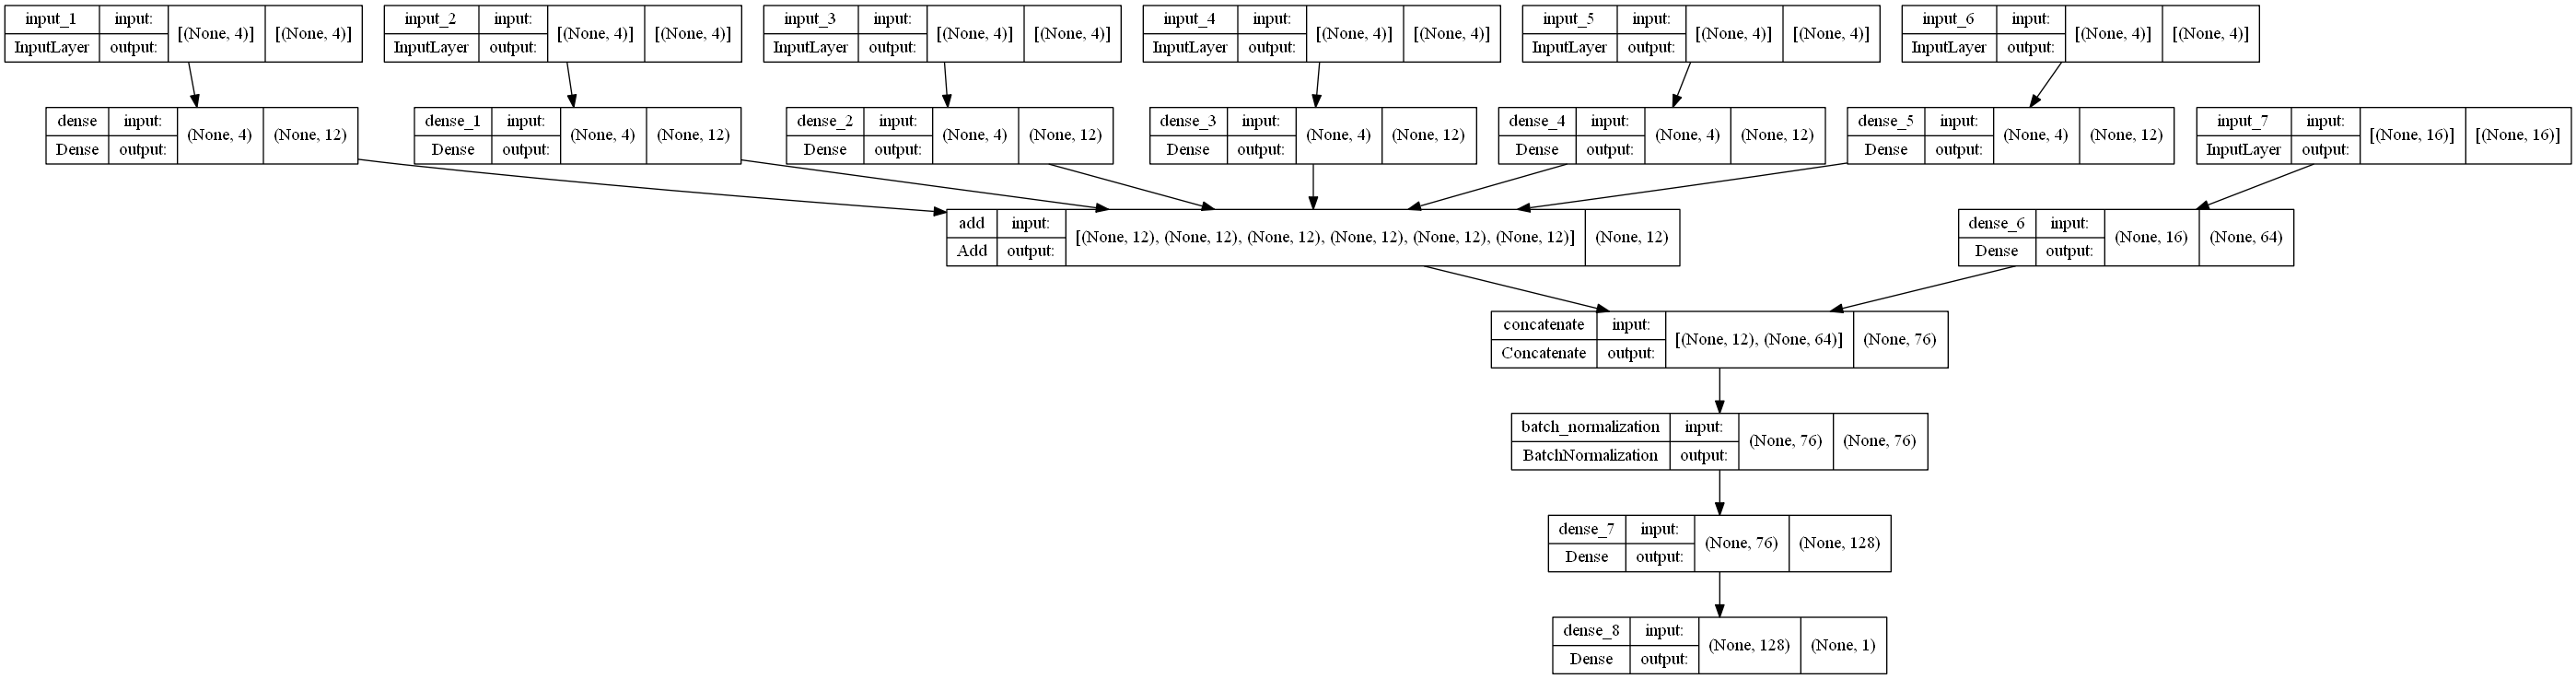

In [24]:
plot_model(model, show_shapes=True)

### 모델 학습

In [25]:
model.fit(tr_list, train_y, validation_split=1/9, verbose=1, epochs=25)

Epoch 1/25
30/30 [==============================] - 1s 6ms/step - loss: 0.5097 - accuracy: 0.7646 - val_loss: 0.7603 - val_accuracy: 0.8305
Epoch 2/25
30/30 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8317 - val_loss: 0.5601 - val_accuracy: 0.8305
Epoch 3/25
30/30 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8360 - val_loss: 0.5082 - val_accuracy: 0.8305
Epoch 4/25
30/30 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8445 - val_loss: 0.4733 - val_accuracy: 0.8305
Epoch 5/25
30/30 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8477 - val_loss: 0.4481 - val_accuracy: 0.8390
Epoch 6/25
30/30 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.8488 - val_loss: 0.4713 - val_accuracy: 0.8390
Epoch 7/25
30/30 [==============================] - 0s 1ms/step - loss: 0.3674 - accuracy: 0.8509 - val_loss: 0.4414 - val_accuracy: 0.8644
Epoch 8/25
30/30 [==

### 모델 예측

In [26]:
pred_y = model.predict(te_list)

pred_y[:11].reshape(-1)

array([0.3461159 , 0.06088501, 0.00486568, 0.0109117 , 0.16349578,
       0.10059747, 0.26661998, 0.04461467, 0.3509695 , 0.542471  ,
       0.02761665], dtype=float32)

In [30]:
for idx, val in enumerate(pred_y) :
    if pred_y[idx] >= 0.5 :
        pred_y[idx] = 1
    else :
        pred_y[idx] = 0

pred_y[:11].reshape(-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## 평가

1. 모델의 정확도를 기재하시오.
2. 이직이라 예측한 것 중 실제로 이직한 비율을 구하시오.
3. 실제 이직 데이터 중 모델이 이직이라 예측한 것의 비율을 구하시오.
4. 남는다고 예측한 것 중 실제로 남아있는 비율을 구하시오.
---
### hidden layer 2개를 사용한 multilayer perceptron 구조와 비교하시오.

### 모델 평가

In [27]:
model.evaluate(te_list, test_y)

4/4 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8814


[0.30852705240249634, 0.8813559412956238]

### confusion matrix

In [28]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(test_y, pred_y, target_names=['No', 'Yes']) )

              precision    recall  f1-score   support

          No       0.91      0.96      0.93       100
         Yes       0.67      0.44      0.53        18

    accuracy                           0.88       118
   macro avg       0.79      0.70      0.73       118
weighted avg       0.87      0.88      0.87       118

